## The Bias-Variance Decompistion

- Bias-variane decomposition is based on averages with respect to ensembles of datasets, whereas in practice we have only the single observed dataset.

- Bias represents the extent to which the average prediction over all datasets differ from the desired regression function.

- Variance measures the extent to w

In [ ]:
# Import required libraries
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
%matplotlib inline

# import from prml library
import sys
sys.path.append("/Users/apple/Documents/Courses/Machine Learning Youtube 2020/Codes/")

from prml.preprocess import GaussianFeature, PolynomialFeature, SigmoidalFeature
from prml.linear import (
    BayesianRegression,
    EmpiricalBayesRegression,
    LinearRegression,
    RidgeRegression
)

# intialize a random seed for reproduce the results
np.random.seed(1234)

In [3]:
def create_toy_data(func, sample_size, std, domain=[0, 1]):
    # create equally space points within the domain of the func
    x = np.linspace(domain[0], domain[1], sample_size)
    np.random.shuffle(x) # randomly shuffle the points
    # output is some function (func) of input points (x) + random normal noise
    t = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, t

In [4]:
def sinusoidal(x):
    return np.sin(2 * np.pi * x)

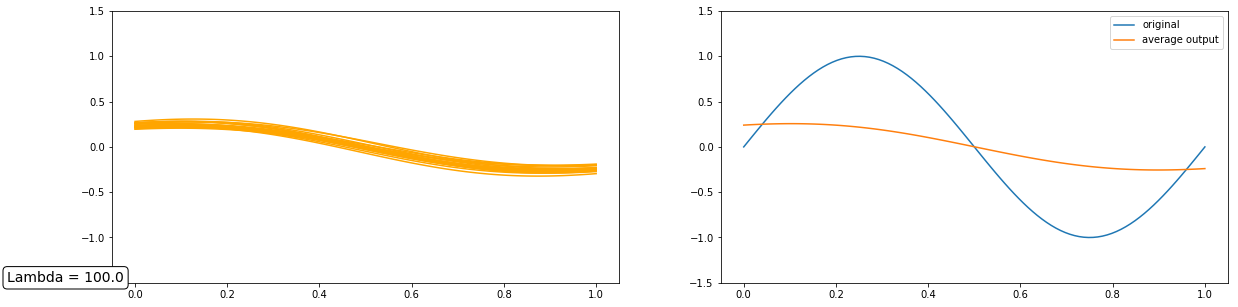

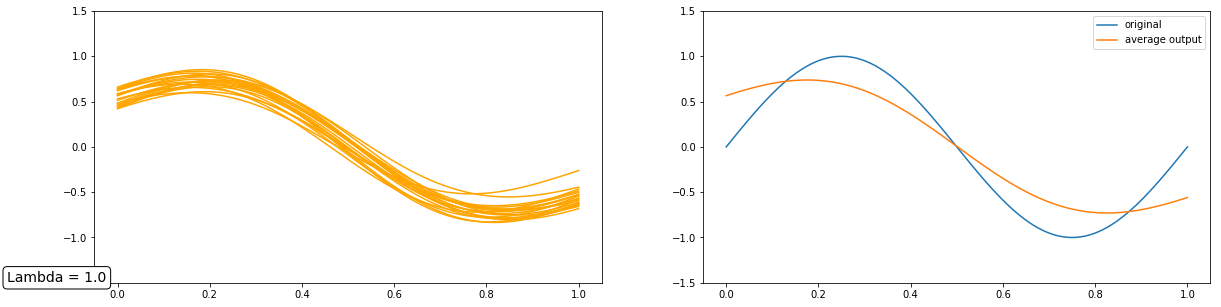

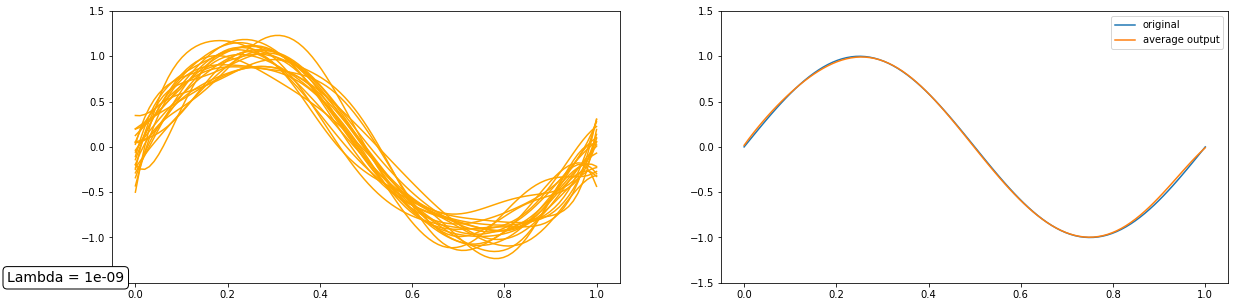

In [14]:
# feature tranforms
# feature = PolynomialFeature(24)
feature = GaussianFeature(np.linspace(0,1,24), 0.1)
# feature = SigmoidalFeature(np.linspace(0,1,24), 10)

x_test = np.linspace(0, 1, 100) # create equally spaced test points on x-axis (100 x 1 vector)
y_test = sinusoidal(x_test) # create test outputs

# larger lambda makes most of the weights zeros and hence leads to larger bias (and less variance)
# smaller lambda leads to larger variance and less bias
# need to strike a balance between the variance and the bias

for a in [1e2, 1.0,1e-9]:
    y_list = []
    plt.figure(figsize = (20,5))
    plt.subplot(1,2,1)
    for i in range(100):
        x_train, y_train = create_toy_data(sinusoidal, 25, 0.25)
        X_train = feature.transform(x_train)
        X_test = feature.transform(x_test)
        
        model = BayesianRegression(alpha = a, beta = 1.0)
        model.fit(X_train, y_train)
        y = model.predict(X_test)
        y_list.append(y)
        
        # compute bias variance and noise
        
        if i < 20:
            plt.plot(x_test, y, c ="orange")
    plt.ylim(-1.5,1.5)
    plt.annotate('Lambda = ' + str(a), xy=(12, 12), xycoords='axes points',
            size=14, ha='right', va='top',
            bbox=dict(boxstyle='round', fc='w'))
    
    plt.subplot(1,2,2)
    plt.plot(x_test,y_test)
    plt.plot(x_test,np.asarray(y_list).mean(axis = 0))
    plt.ylim(-1.5,1.5)
    plt.legend(['original', 'average output'])
    plt.show()